In [1]:
# Importing required libraries
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import sklearn
import string

print(f'Python: {sys.version}')
print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Sklearn: {sklearn.__version__}')

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.18.1
Pandas: 1.0.1
Matplotlib: 3.1.3
Seaborn: 0.10.0
Sklearn: 0.22.1


In [2]:
# Reading the dataset
df = pd.read_csv('emails.csv')

In [3]:
# Exploring the dataset
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
df.shape

(5728, 2)

In [6]:
# Removing the duplicate values in the data
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(5695, 2)

In [8]:
# Checking if there are any null values
print(df.isnull().sum())

text    0
spam    0
dtype: int64


In [9]:
# Count of spam and nonspam values in the data set
spam = df[df['spam'] == 1].count()['spam']
nonspam = df[df['spam'] == 0].count()['spam']

print(f'Spam Values: {spam}')
print(f'Nonspam Values: {nonspam}')

Spam Values: 1368
Nonspam Values: 4327


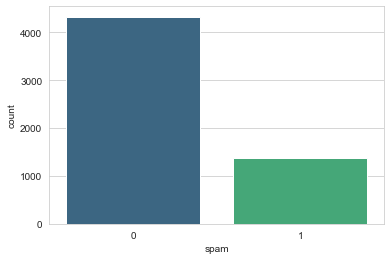

In [10]:
# Visualising with the help of Count Plot in Seaborn
sns.set_style('whitegrid')
sns.countplot(x='spam',data=df,palette='viridis')

In [11]:
# Downloading the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [13]:
# Tokenization
df['text'].head().apply(process)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [14]:
# Converting the text into matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
message = CountVectorizer(analyzer=process).fit_transform(df['text'])

In [15]:
# Splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(message, df['spam'], test_size=0.30)

In [16]:
print(message.shape)

(5695, 37229)


In [17]:
# Importing Supervised Learning models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Defining classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'MultinomialNB': MultinomialNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score    

In [20]:
names = []
accuracy_scores = []

for clf_name, clf in classifiers.items():
    classifier = clf.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    
    names.append(clf_name)
    acc_score = accuracy_score(y_test,predictions)
    accuracy_scores.append(acc_score)
    
    print(f'{clf_name}:\n')
    print('Accuracy: ',acc_score)
    print('Classification Report:\n',classification_report(y_test,predictions))
    print('Confusion Matrix:\n', confusion_matrix(y_test,predictions))
    
    print('\n\n')

Logistic Regression:

Accuracy:  0.9888823873610298
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1317
           1       0.97      0.98      0.98       392

    accuracy                           0.99      1709
   macro avg       0.98      0.98      0.98      1709
weighted avg       0.99      0.99      0.99      1709

Confusion Matrix:
 [[1307   10]
 [   9  383]]



MultinomialNB:

Accuracy:  0.9859566998244588
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1317
           1       0.95      0.99      0.97       392

    accuracy                           0.99      1709
   macro avg       0.97      0.99      0.98      1709
weighted avg       0.99      0.99      0.99      1709

Confusion Matrix:
 [[1296   21]
 [   3  389]]



SVM:

Accuracy:  0.9748390871854886
Classification Report:
               precision    recall  f1-scor

In [21]:
names = np.array(names)
accuracy_scores = np.array(accuracy_scores)

df_acc = pd.DataFrame({'names': names, 'accuracy_scores': accuracy_scores}, columns=['names', 'accuracy_scores'])

In [22]:
df_acc

,names,accuracy_scores
0,Logistic Regression,0.988882
1,MultinomialNB,0.985957
2,SVM,0.974839
3,KNN,0.905793


In [23]:
# We can see that Logistic Regression has the highest accuracy followed Multinomial Naïve Bayes